# 模型误差分析工具

这个notebook用于分析和比较多个模型的L1和L2误差。使用方法如下：

1. 在下面的代码单元中添加模型数据
2. 运行所有单元格即可看到比较结果

数据格式示例：
```python
model_errors = {
    "模型A": """
    L1 error: [0.1, 0.2, 0.3]
    L2 error: [0.2, 0.3, 0.4]
    """,
    "模型B": """
    L1 error: [0.2, 0.3, 0.4]
    L2 error: [0.3, 0.4, 0.5]
    """
}
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
model_errors = {

    "transformer_ntk 45w": """
    L1 error: [0.04522626799198226, 0.10515518939080436, 0.16966041825268516, 0.04146880014476679, 0.07674668048424906, 0.31612810062610863, 0.05399943718867059, 0.5968108493514233, 0.08961905472408527, 0.2373711349391195]
    L2 error: [0.04968904673256734, 0.11511989216256753, 0.18026810103369661, 0.0425493890209827, 0.08115607903030539, 0.32998238143058783, 0.05621281855853973, 0.594779319827157, 0.09616343346782191, 0.2549664826063321]
    """,
    "diffdecoder_ntk 45w": """
    L1 error: [0.2490929207114397, 0.07068358799826363, 0.07436251756073715, 0.33702096473935883, 0.34018193158326, 0.17962399565471762, 0.0907091734608437, 0.262069990609635, 0.23813046730371606, 0.058917159442065825]
    L2 error: [0.2642005996861112, 0.07259591432973712, 0.07651841668217627, 0.35097979322591905, 0.3502999328625106, 0.19066465131835608, 0.09938424568101789, 0.2769226797926927, 0.2504610456051948, 0.06105516670795394]
    """,

    "transformer_ntk 62w": """
    L1 error: [0.25388932927898117, 0.17392281619664798, 0.09050568214245387, 0.2696597365297083, 0.2336379700184806, 0.21049093392801452, 0.24354463356623604, 0.11308869766048207, 0.12653897331487754, 0.2506829143425308]
    L2 error: [0.27209568171399146, 0.18719887557240714, 0.10032290431019797, 0.2864455025762739, 0.2502508235620428, 0.22784861125659547, 0.26066603772447955, 0.1315401640625048, 0.13508559839067338, 0.26639553599042276]
    """,
    "diffdecoder_ntk 62w": """
    L1 error: [0.1601455656000448, 0.1422332592324562, 0.2508689002689206, 0.4109201046806496, 0.22172856966391324, 0.3088251532444094, 0.08501399757639898, 0.3086490185486893, 0.3988031736685064, 0.2941249360238179]
    L2 error: [0.1710127737632288, 0.15384527066753878, 0.26679511522764515, 0.40860731814635687, 0.2369510163018386, 0.32426148329928145, 0.09068520582396239, 0.3242331402390263, 0.40245925162719814, 0.3081473546878979]
    """,

    
    
    
}

<Figure size 1500x800 with 0 Axes>

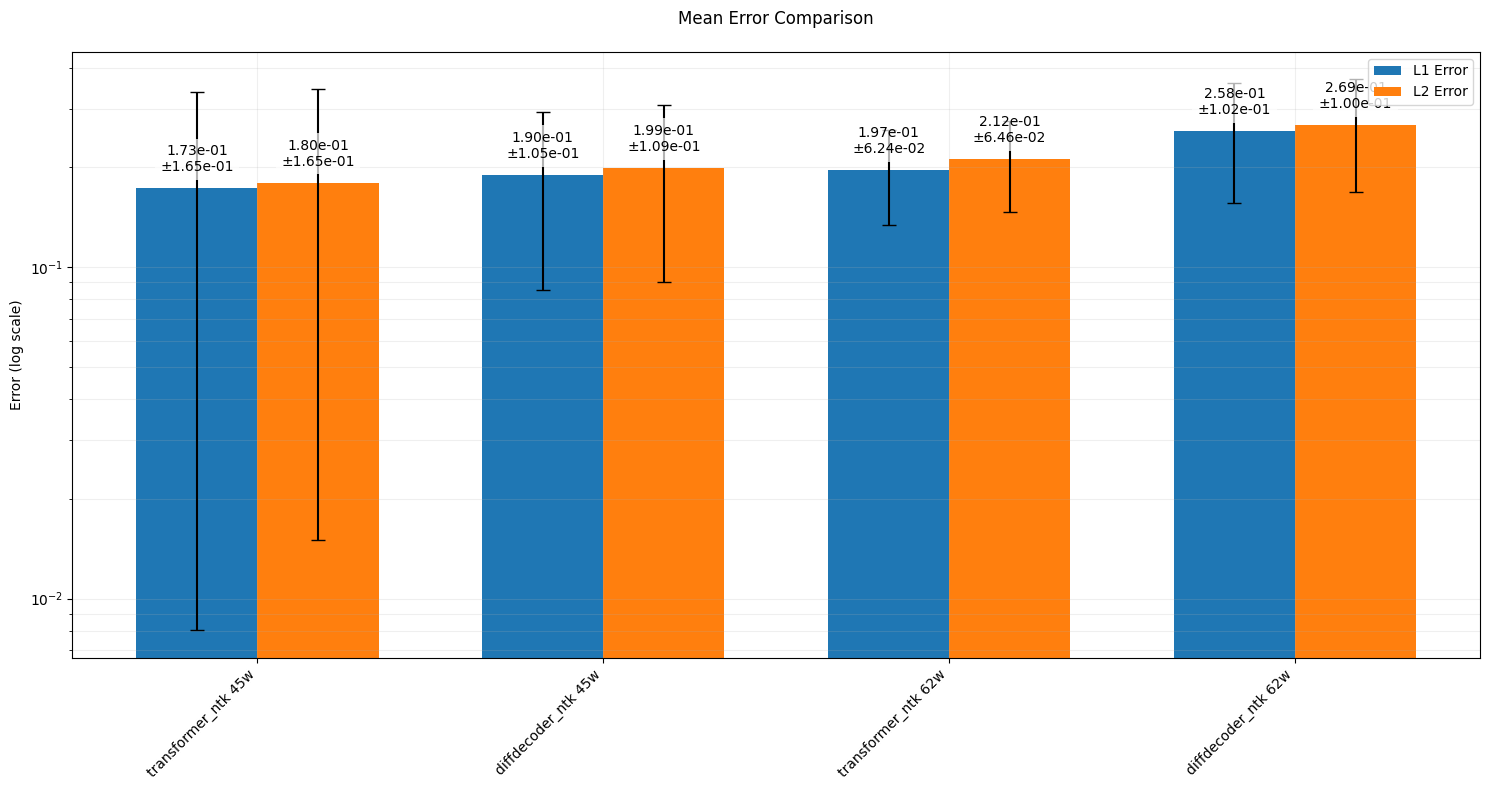


=== 统计结果汇总 ===

transformer_ntk 45w:
L1误差 - 均值: 1.732186e-01 ± 1.651858e-01
L2误差 - 均值: 1.800887e-01 ± 1.650338e-01

diffdecoder_ntk 45w:
L1误差 - 均值: 1.900793e-01 ± 1.048474e-01
L2误差 - 均值: 1.993082e-01 ± 1.090693e-01

transformer_ntk 62w:
L1误差 - 均值: 1.965962e-01 ± 6.242297e-02
L2误差 - 均值: 2.117850e-01 ± 6.455324e-02

diffdecoder_ntk 62w:
L1误差 - 均值: 2.581313e-01 ± 1.019468e-01
L2误差 - 均值: 2.686998e-01 ± 1.003135e-01


In [3]:
# 处理数据并创建均值标准差对比图
processed_data = {}
for model_name, model_text in model_errors.items():
    lines = model_text.strip().split('\n')
    for line in lines:
        line = line.strip()
        if "L1 error:" in line:
            l1_data = np.array(eval(line[line.find("["):line.find("]")+1]))
        elif "L2 error:" in line:
            l2_data = np.array(eval(line[line.find("["):line.find("]")+1]))
    processed_data[model_name] = {
        'L1': l1_data,
        'L2': l2_data
    }

# 创建均值和标准差对比图
plt.figure(figsize=(15, 8))
fig, ax = plt.subplots(figsize=(15, 8))

x = np.arange(len(processed_data))
width = 0.35

# 计算均值和标准差
means_l1 = [np.mean(data['L1']) for data in processed_data.values()]
stds_l1 = [np.std(data['L1']) for data in processed_data.values()]
means_l2 = [np.mean(data['L2']) for data in processed_data.values()]
stds_l2 = [np.std(data['L2']) for data in processed_data.values()]

# 绘制柱状图
bars1 = ax.bar(x - width/2, means_l1, width, yerr=stds_l1, 
               label='L1 Error', capsize=5)
bars2 = ax.bar(x + width/2, means_l2, width, yerr=stds_l2,
               label='L2 Error', capsize=5)

# 设置对数坐标
ax.set_yscale('log')

# 在柱状图上添加数值标签（使用原始值，不取对数）
def autolabel(rects, stds):
    for i, rect in enumerate(rects):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height * 1.1,
               f'{height:.2e}\n±{stds[i]:.2e}',
               ha='center', va='bottom', rotation=0,
               bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

autolabel(bars1, stds_l1)
autolabel(bars2, stds_l2)

ax.set_ylabel('Error (log scale)')
ax.set_title('Mean Error Comparison', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(list(processed_data.keys()), rotation=45, ha='right')
ax.legend(loc='upper right')
ax.grid(True, which="both", ls="-", alpha=0.2)

# 调整布局以防止标签被截断
plt.tight_layout()
plt.show()

# 打印详细的统计信息
print("\n=== 统计结果汇总 ===")
for model_name, data in processed_data.items():
    print(f"\n{model_name}:")
    print(f"L1误差 - 均值: {np.mean(data['L1']):.6e} ± {np.std(data['L1']):.6e}")
    print(f"L2误差 - 均值: {np.mean(data['L2']):.6e} ± {np.std(data['L2']):.6e}")

<Figure size 2000x1000 with 0 Axes>

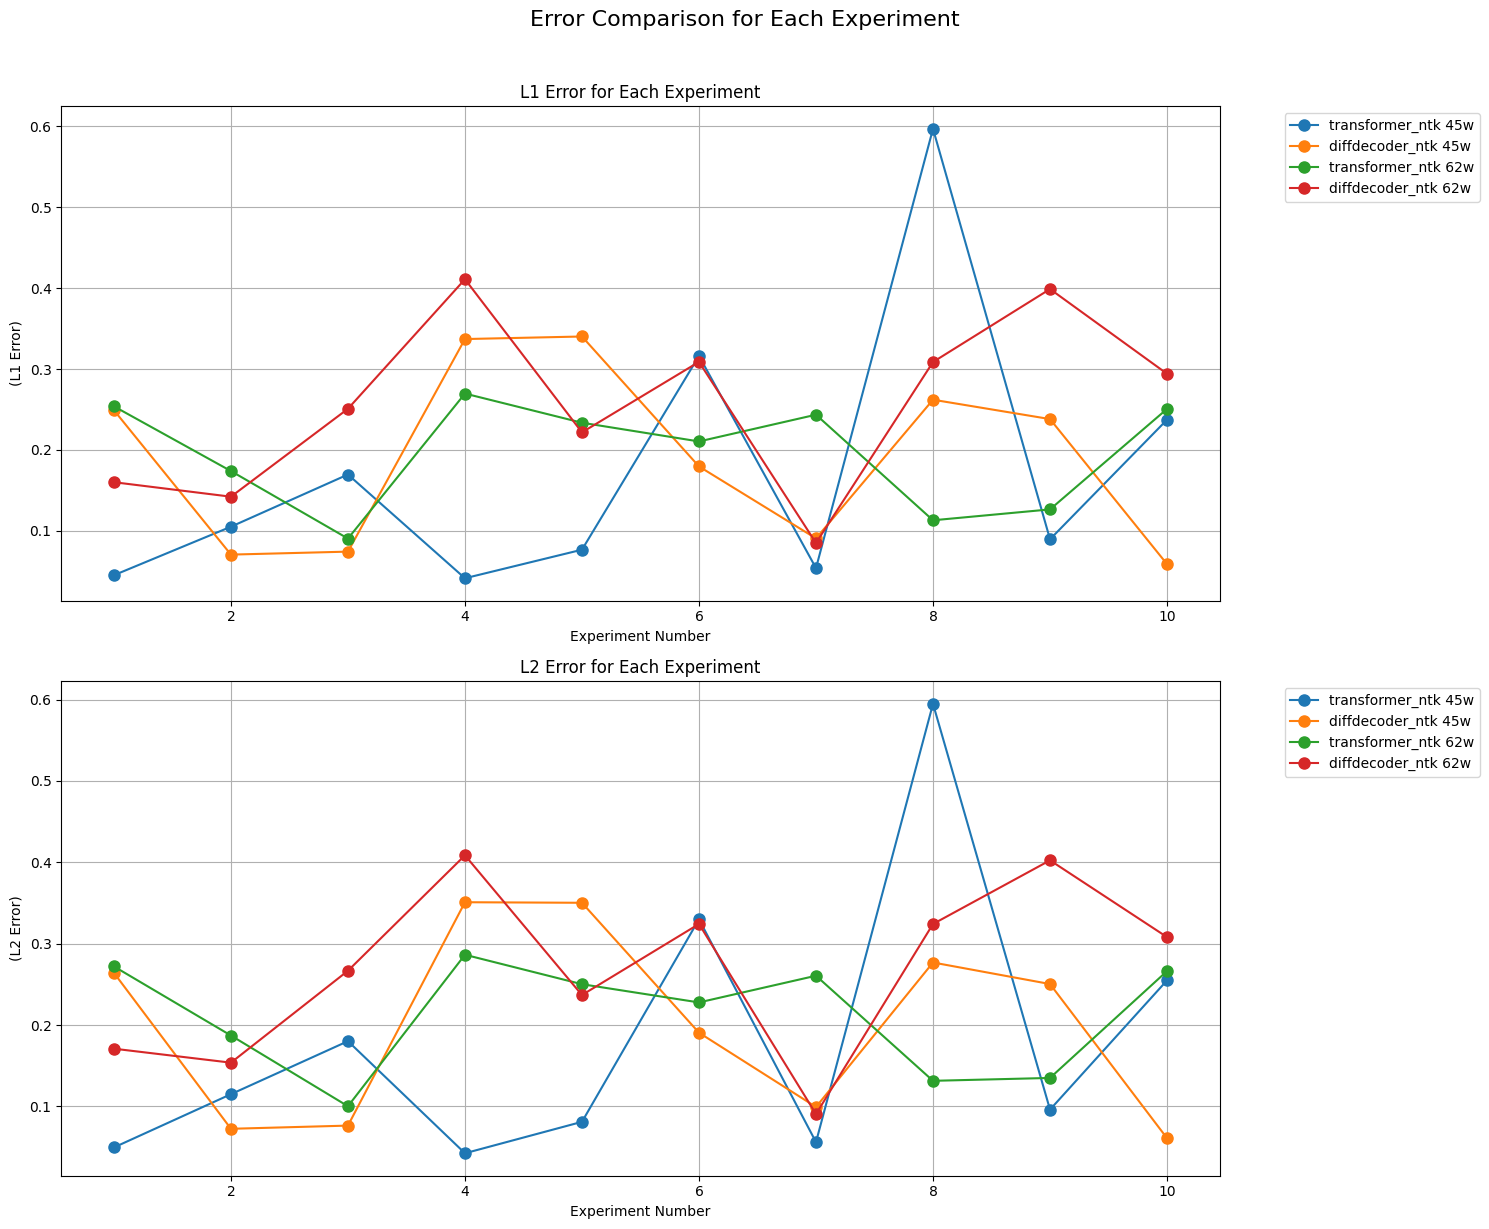

In [4]:

# 创建对数变换后的误差对比折线图
plt.figure(figsize=(20, 10))
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))
fig.suptitle('Error Comparison for Each Experiment', fontsize=16, y=1.02)

# 生成x轴标签（实验次数）
x = np.arange(1, len(next(iter(processed_data.values()))['L1']) + 1)

# 绘制L1误差的对数变换折线图
for model_name, data in processed_data.items():
    l1 = data['L1']  # 对数变换
    ax1.plot(x, l1, 'o-', label=model_name, markersize=8)
    
ax1.set_title('L1 Error for Each Experiment')
ax1.set_xlabel('Experiment Number')
ax1.set_ylabel('(L1 Error)')
ax1.grid(True)
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 绘制L2误差的对数变换折线图
for model_name, data in processed_data.items():
    l2 = data['L2']  # 对数变换
    ax2.plot(x, l2, 'o-', label=model_name, markersize=8)
    
ax2.set_title('L2 Error for Each Experiment')
ax2.set_xlabel('Experiment Number')
ax2.set_ylabel('(L2 Error)')
ax2.grid(True)
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


